In [6]:
from PIL import Image
import matplotlib
import requests
from io import BytesIO
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

from get_palette import extract_colors

def display_palette(colors):
    """
    Displays the given color palette
    """
    palette = np.zeros((50, 500, 3), dtype=int)
    for i, color in enumerate(colors):
        palette[:, i*100:(i+1)*100] = color
    plt.imshow(palette)
    plt.axis('off')
    plt.show()

def rotate_hue(color, angle):
    """
    Rotates the hue of the given color by 180 degrees
    """
    # Convert the RGB color to HSV
    r, g, b = color
    hsv = matplotlib.colors.rgb_to_hsv((r/255, g/255, b/255))
    h, s, v = hsv

    # Rotate the hue and convert back to RGB
    h = (h + angle) % 1
    r, g, b = matplotlib.colors.hsv_to_rgb((h, s, v))
    return int(r*255), int(g*255), int(b*255)


image_path = "Lenna.png"

# Number of colors to extract
num_colors = 6

# Extract the colors
colors = extract_colors(image_path, num_colors)
print(colors)
# Display the palette
display_palette(colors)

# Rotate the hue of each color by 180 degrees
new_colors = [rotate_hue(color, 0.5) for color in colors]
print(new_colors)
# Display the new palette
display_palette(new_colors)



Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/gabrielvidal/Library/Python/3.10/lib/python/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/c9/5bv9yjyj5dxg9xs69xkbly980000gn/T/ipykernel_6070/2254849323.py", line 43, in <module>
    colors = extract_colors(image_path, num_colors)
  File "/Users/gabrielvidal/PROJECTS/palette-controlnet/get_palette.py", line 10, in extract_colors
AttributeError: 'str' object has no attribute 'resize'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/gabrielvidal/Library/Python/3.10/lib/python/site-packages/IPython/core/interactiveshell.py", line 2105, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "/Users/gabrielvidal/Library/Python/3.10/lib/python/site-packages/IPython/core/ultratb.py", line 1396, in structured_traceback
    return FormattedTB.structured_trac

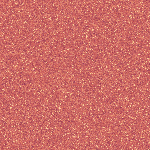

In [4]:
from torchvision import transforms
from PIL import Image
from get_palette import Palettify, ExtractPalette
from torchvision import transforms

image_path = "Lenna.png"

image = Image.open(image_path)

# Define the transformations to be applied to the image
common_transforms = transforms.Compose(
        [
            # transforms.ColorJitter(hue=0.5),
            transforms.RandomHorizontalFlip(p=0.5),
            ExtractPalette(num_colors=5),
            Palettify(num_colors=5)
        ]
    )

# Apply the transformations
image = common_transforms(image)


# Display the image
display(image)

image.save("Lenna_transformed.png")

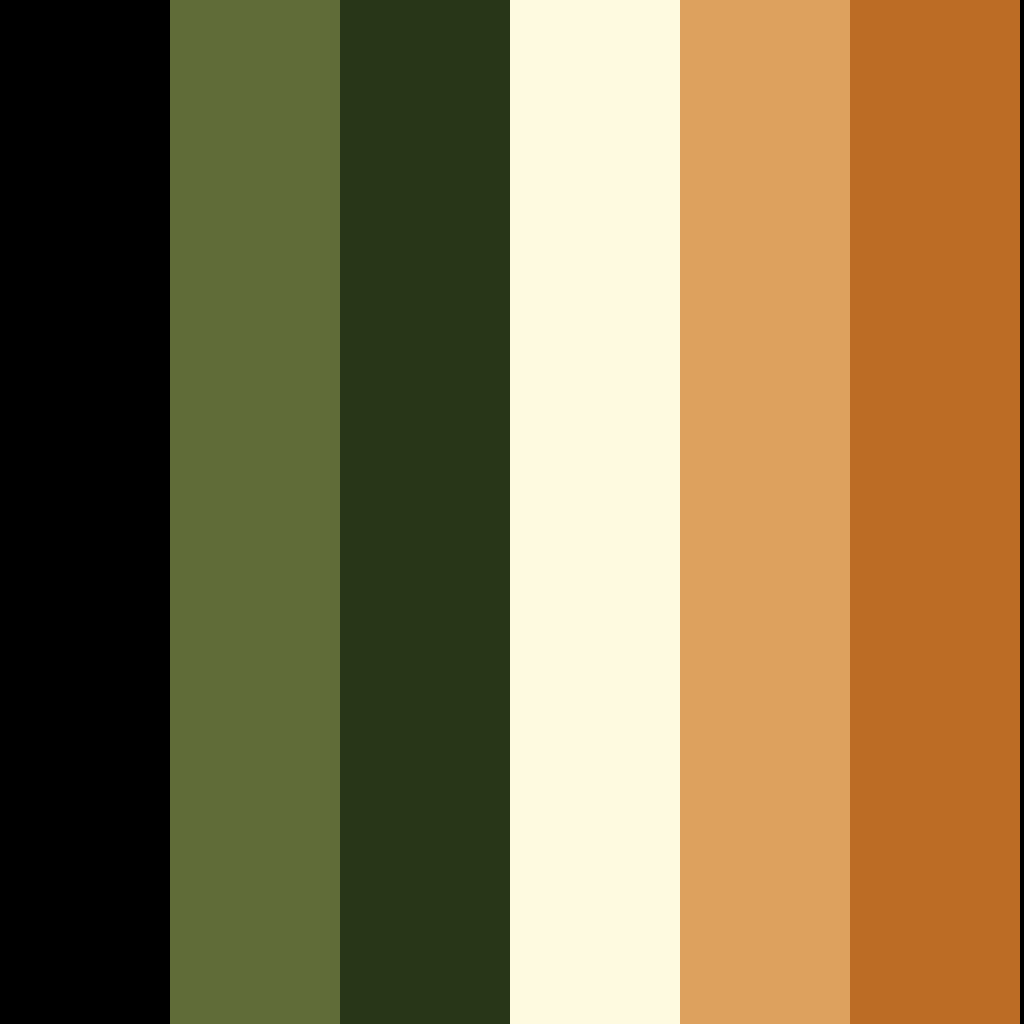

Rotated image


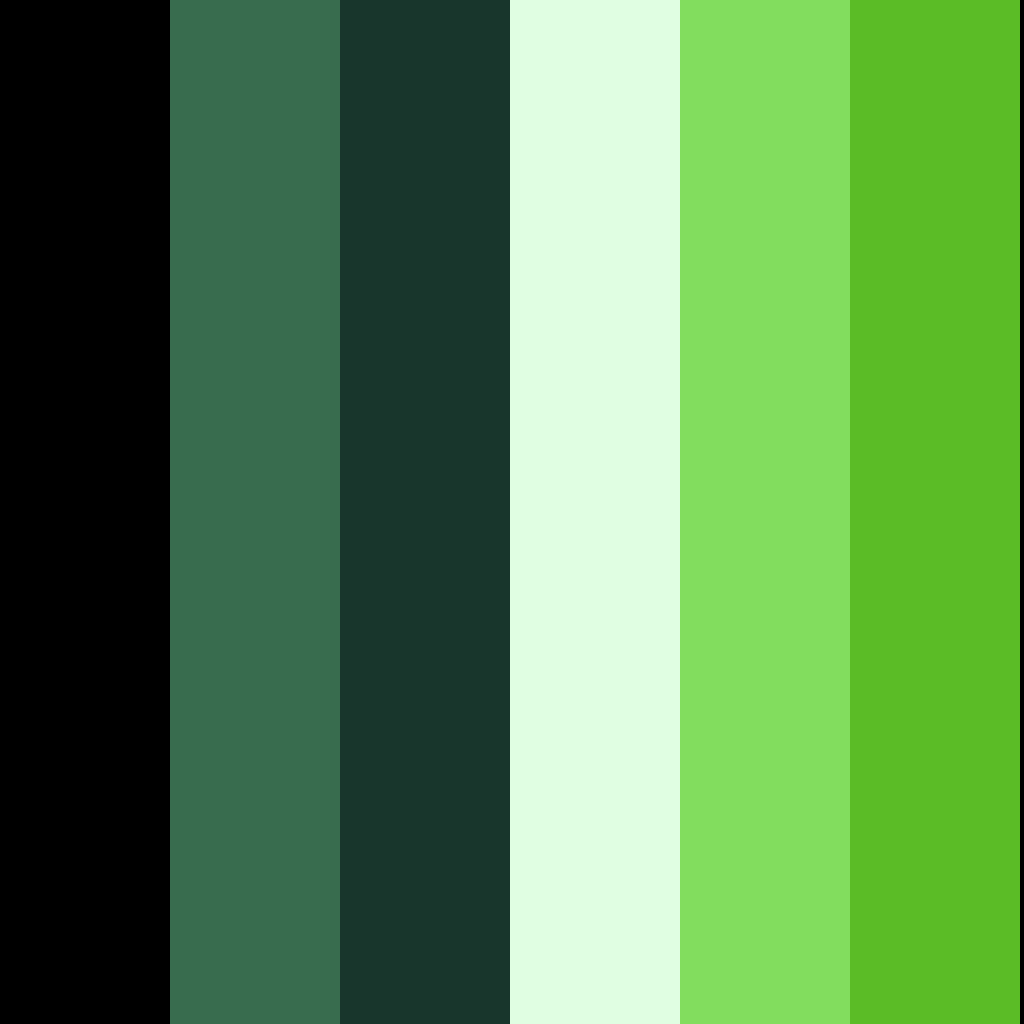

In [2]:
from get_palette import  hex_string_to_image
from utils import rotate_hue

# Define the hex string
a = "000000,606c38,283618,fefae0,dda15e,bc6c25"

a = a.replace("-", ",")
# Convert the hex string to an image
image = hex_string_to_image(a, (1024, 1024))

# Display the image
display(image)

image = rotate_hue(image, 0.5)
print("Rotated image")
display(image)



In [1]:
from datasets import load_dataset
import datasets


/Users/gabrielvidal/PROJECTS/palette-controlnet/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


KeyboardInterrupt: 